In [1]:
# Start with importing the libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
# Data Exploration

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [6]:
df.shape

(5282, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [ ]:
#there are no missing value
#Now we will check for bad data or anomoly

In [8]:
object_columns = ['SeniorCitizen', 'gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for col in object_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-")

Value counts for SeniorCitizen:
0    4426
1     856
Name: SeniorCitizen, dtype: int64
-
Value counts for gender:
Male      2657
Female    2625
Name: gender, dtype: int64
-
Value counts for Partner:
No     2749
Yes    2533
Name: Partner, dtype: int64
-
Value counts for Dependents:
No     3713
Yes    1569
Name: Dependents, dtype: int64
-
Value counts for PhoneService:
Yes    4752
No      530
Name: PhoneService, dtype: int64
-
Value counts for MultipleLines:
No                  2519
Yes                 2233
No phone service     530
Name: MultipleLines, dtype: int64
-
Value counts for InternetService:
Fiber optic    2323
DSL            1816
No             1143
Name: InternetService, dtype: int64
-
Value counts for OnlineSecurity:
No                     2618
Yes                    1521
No internet service    1143
Name: OnlineSecurity, dtype: int64
-
Value counts for OnlineBackup:
No                     2300
Yes                    1839
No internet service    1143
Name: OnlineBackup, dtype: i

In [9]:
df['tenure'].describe()

count    5282.000000
mean       32.362931
std        24.627623
min         0.000000
25%         9.000000
50%        29.000000
75%        55.750000
max        72.000000
Name: tenure, dtype: float64

In [10]:
df['MonthlyCharges'].describe()

count    5282.000000
mean       64.856626
std        30.171934
min        18.400000
25%        35.450000
50%        70.500000
75%        89.987500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [11]:
print(sorted(df['TotalCharges'].unique()))

[' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9', '1001.2', '1001.5', '1003.05', '1004.5', '1004.75', '1005.7', '1006.9', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.45', '101.65', '101.9', '1010', '1011.5', '1011.8', '1012.4', '1013.05', '1013.35', '1013.6', '1014.25', '102.5', '102.75', '1020.75', '1021.55', '1021.8', '1022.5', '1023.75', '1023.85', '1023.9', '1023.95', '1024', '1024.65', '1024.7', '1025.05', '1025.15', '1025.95', '1026.35', '1027.25', '1028.9', '1029.75', '1029.8', '1031.1', '1031.4', '1031.7', '1032', '1033', '1033.9', '1035.5', '1035.7', '1036', '1037.75', '1039.45', '104.2', '104.3', '1041.8', '1043.35', '1043.8', '1045.25', '1046.1', '1046.2', '1046.5', '1047.7', '1048.45', '1049.05', '105.5', '1051.05', '1052.35', '1054.6', '1054.75', '1054.8', '1055.9', '1056.95', '1057.55', '1057.85', '1058.1', '1058.25', '1058.6', '1059.55', '106.2', '106.55', '106.8', '106.85', '1060.2', '1061.6', '1062.1', '1064.65', '1066.15', '1066.9', '1067.05',

In [12]:
#We have some " " in TotalCharges column 

In [13]:
# Step 1: Replace spaces with NaN
df['TotalCharges'].replace(' ', np.nan, inplace=True)

# Step 2: Convert to float
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [15]:
#Now we will replace the nan with the median

In [16]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [17]:
#Now we will check the boxplot to check the any outliers

<Axes: xlabel='TotalCharges'>

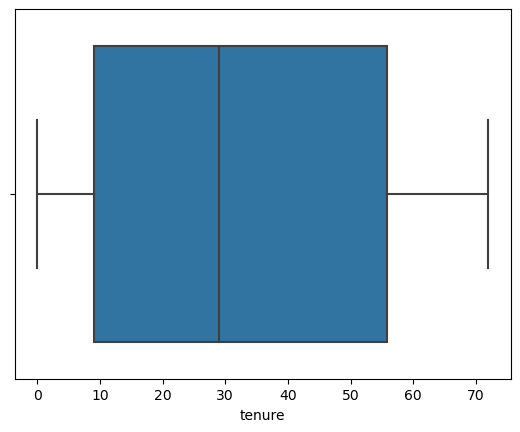

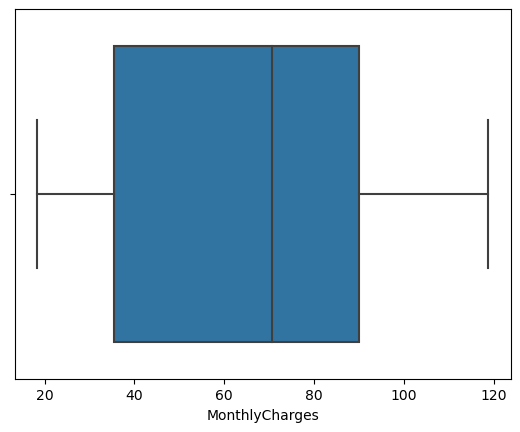

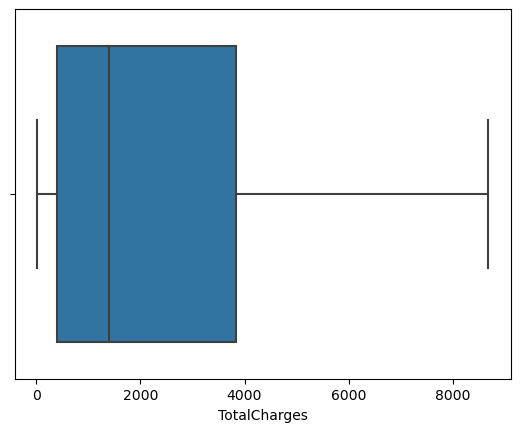

In [18]:
plt.figure()
sns.boxplot(x='tenure',data=df)
plt.figure()
sns.boxplot(x='MonthlyCharges',data=df)
plt.figure()
sns.boxplot(x='TotalCharges',data=df)

In [19]:
#there are no outliers in the data


In [21]:
# we can drop the customerID to check the duplicates and save spaces

In [22]:
df.drop('customerID',axis=1,inplace=True)

In [23]:
# Now we will check the Duplicate rows

In [24]:
dups = df.duplicated()
print('number of duplicate = %d' % (dups.sum()))

number of duplicate = 13


In [25]:
#We have 13 duplicate rows, we can drop these

In [26]:
df = df.drop_duplicates()

In [27]:
#rows are reduced by 13

In [28]:
df.shape

(5269, 20)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5269 non-null   object 
 1   SeniorCitizen     5269 non-null   int64  
 2   Partner           5269 non-null   object 
 3   Dependents        5269 non-null   object 
 4   tenure            5269 non-null   int64  
 5   PhoneService      5269 non-null   object 
 6   MultipleLines     5269 non-null   object 
 7   InternetService   5269 non-null   object 
 8   OnlineSecurity    5269 non-null   object 
 9   OnlineBackup      5269 non-null   object 
 10  DeviceProtection  5269 non-null   object 
 11  TechSupport       5269 non-null   object 
 12  StreamingTV       5269 non-null   object 
 13  StreamingMovies   5269 non-null   object 
 14  Contract          5269 non-null   object 
 15  PaperlessBilling  5269 non-null   object 
 16  PaymentMethod     5269 non-null   object 


In [30]:
#Now we will do Label encoding on Categorical coloumn, to get the data into 1 & 0 to change the data types

In [31]:
df['Gender_encoded'] = df['gender'].map({'Male':0,'Female':1})
df['Partner_encoded'] = df['Partner'].map({'No':0,'Yes':1})
df['Dependents_encoded'] = df['Dependents'].map({'No':0,'Yes':1})
df['PhoneService_encoded'] = df['PhoneService'].map({'No':0,'Yes':1})
df['MultipleLines_encoded'] = df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':2})
df['InternetService_encoded'] = df['InternetService'].map({'No':0,'DSL':1,'Fiber optic':2})
df['OnlineSecurity_encoded'] = df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':2})
df['OnlineBackup_encoded'] = df['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':2})
df['DeviceProtection_encoded'] = df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':2})
df['TechSupport_encoded'] = df['TechSupport'].map({'No':0,'Yes':1,'No internet service':2})
df['StreamingTV_encoded'] = df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':2})
df['StreamingMovies_encoded'] = df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':2})
df['Contract_encoded'] = df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
df['PaperlessBilling_encoded'] = df['PaperlessBilling'].map({'No':0,'Yes':1})
df['PaymentMethod_encoded'] = df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded
0,Female,0,Yes,Yes,72,No,No phone service,DSL,No,Yes,...,1,0,1,0,1,1,1,2,0,3
1,Female,0,No,No,4,Yes,No,DSL,No,No,...,1,0,0,0,0,0,0,0,1,1
2,Male,0,No,Yes,56,Yes,No,No,No internet service,No internet service,...,0,2,2,2,2,2,2,1,1,1
3,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,...,2,0,1,0,1,0,1,0,1,0
4,Female,0,No,No,9,Yes,No,Fiber optic,No,No,...,2,0,0,0,0,0,1,0,1,0


In [33]:
#Now data types are changed to int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5281
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    5269 non-null   object 
 1   SeniorCitizen             5269 non-null   int64  
 2   Partner                   5269 non-null   object 
 3   Dependents                5269 non-null   object 
 4   tenure                    5269 non-null   int64  
 5   PhoneService              5269 non-null   object 
 6   MultipleLines             5269 non-null   object 
 7   InternetService           5269 non-null   object 
 8   OnlineSecurity            5269 non-null   object 
 9   OnlineBackup              5269 non-null   object 
 10  DeviceProtection          5269 non-null   object 
 11  TechSupport               5269 non-null   object 
 12  StreamingTV               5269 non-null   object 
 13  StreamingMovies           5269 non-null   object 
 14  Contract

In [35]:
#Now we can drop the extra column as we have done the label encoding

In [36]:
df.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
        'PaymentMethod'],axis=1,inplace=True)

In [37]:
#extra coulumns have dropped now

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeniorCitizen             5269 non-null   int64  
 1   tenure                    5269 non-null   int64  
 2   MonthlyCharges            5269 non-null   float64
 3   TotalCharges              5269 non-null   float64
 4   Churn                     5269 non-null   int64  
 5   Gender_encoded            5269 non-null   int64  
 6   Partner_encoded           5269 non-null   int64  
 7   Dependents_encoded        5269 non-null   int64  
 8   PhoneService_encoded      5269 non-null   int64  
 9   MultipleLines_encoded     5269 non-null   int64  
 10  InternetService_encoded   5269 non-null   int64  
 11  OnlineSecurity_encoded    5269 non-null   int64  
 12  OnlineBackup_encoded      5269 non-null   int64  
 13  DeviceProtection_encoded  5269 non-null   int64  
 14  TechSupp

In [40]:
#Now we will scale the Continous data column using Z score

In [41]:
num=['tenure','MonthlyCharges','TotalCharges']      
from scipy.stats import zscore
data_scale=df[num].apply(zscore)
df[num] = data_scale

In [42]:
#the data is scaled now

In [43]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded
0,0,1.607708,-0.373662,0.649977,0,1,1,1,0,2,1,0,1,0,1,1,1,2,0,3
1,0,-1.155816,-0.627311,-0.922315,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1
2,0,0.957467,-1.449599,-0.464672,0,0,0,1,1,0,0,2,2,2,2,2,2,1,1,1
3,0,0.957467,0.979134,1.237047,1,0,0,0,1,1,2,0,1,0,1,0,1,0,1,0
4,0,-0.952616,0.485098,-0.690308,1,1,0,0,1,0,2,0,0,0,0,0,1,0,1,0


In [ ]:
# we will check the heat map to see the correlation 

<Axes: >

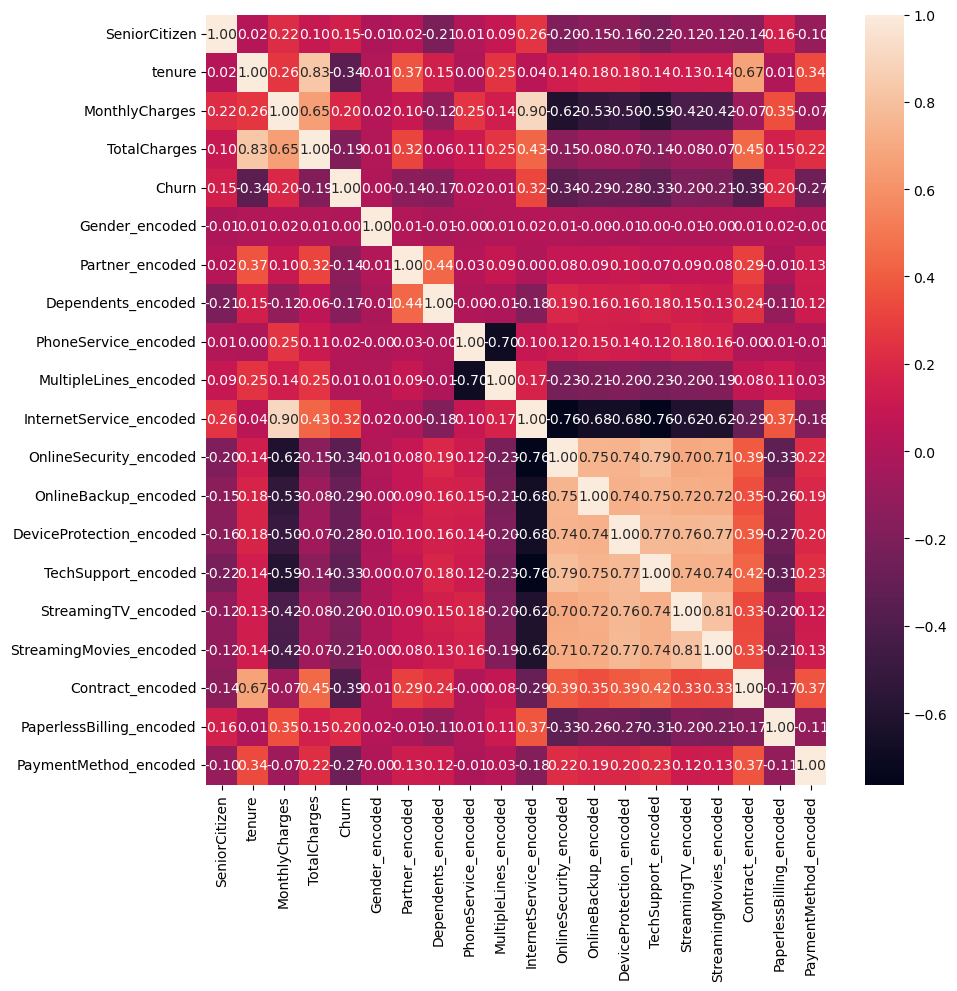

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [45]:
# Now we will import Logistic regression from Sklearn linearmodel
#train_test_split from  sklearn.model_selection 
#classification_report from sklearn.metric to perform Logistic Regression as the we need to predict Categorical data

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [47]:
 #Splitting data into training and test sets
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

# Creating a Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Printing the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       963
           1       0.67      0.54      0.60       355

    accuracy                           0.81      1318
   macro avg       0.76      0.72      0.74      1318
weighted avg       0.80      0.81      0.80      1318



In [48]:
#we got good accuracy and F1 Score, so our model is good

In [49]:
#Now we will clean the active customer dataset as we have done with the Train data

In [50]:
dfact = pd.read_csv('active_customers.csv')

In [51]:
dfact.shape

(1761, 20)

In [52]:
dfact.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5343-SGUBI,Female,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,Yes,Mailed check,80.20,4297.6
1,5442-BXVND,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.25,838.5
2,6434-TTGJP,Male,0,Yes,Yes,10,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),53.70,521
3,1628-BIZYP,Male,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85
4,0298-XACET,Male,0,Yes,Yes,52,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,50.20,2554


In [53]:
dfact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [ ]:
#there are no missing value
#Now we will check for bad data or anomoly

In [54]:
object_columns = ['SeniorCitizen', 'gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']
for col in object_columns:
    print(f"Value counts for {col}:")
    print(dfact[col].value_counts())
    print("-")

Value counts for SeniorCitizen:
0    1475
1     286
Name: SeniorCitizen, dtype: int64
-
Value counts for gender:
Male      898
Female    863
Name: gender, dtype: int64
-
Value counts for Partner:
No     892
Yes    869
Name: Partner, dtype: int64
-
Value counts for Dependents:
No     1220
Yes     541
Name: Dependents, dtype: int64
-
Value counts for PhoneService:
Yes    1609
No      152
Name: PhoneService, dtype: int64
-
Value counts for MultipleLines:
No                  871
Yes                 738
No phone service    152
Name: MultipleLines, dtype: int64
-
Value counts for InternetService:
Fiber optic    773
DSL            605
No             383
Name: InternetService, dtype: int64
-
Value counts for OnlineSecurity:
No                     880
Yes                    498
No internet service    383
Name: OnlineSecurity, dtype: int64
-
Value counts for OnlineBackup:
No                     788
Yes                    590
No internet service    383
Name: OnlineBackup, dtype: int64
-
Value cou

In [55]:
print(sorted(dfact['TotalCharges'].unique()))

[' ', '1004.35', '1008.7', '101.1', '1011.05', '1013.2', '1016.7', '1017.35', '102.45', '1020.2', '1021.75', '1022.6', '1022.95', '1025.15', '1028.75', '1029.35', '103.7', '1032.05', '1033.95', '1036.75', '1042.65', '1043.3', '1043.4', '1048.85', '1049.6', '105.6', '1050.5', '1051.9', '1052.4', '1057', '106.9', '1060.6', '1064.95', '107.05', '107.1', '1070.15', '1070.25', '1071.6', '1074.65', '1077.5', '1077.95', '108.65', '108.95', '1080.55', '1082.8', '1083.7', '1090.1', '1090.6', '1092.35', '1093', '1093.2', '1108.2', '1108.8', '112.3', '1122.4', '1123.15', '1123.65', '1124.2', '1128.1', '113.5', '113.55', '1130.85', '1131.2', '1132.35', '1138.8', '1143.8', '1147.45', '115.1', '1153.25', '1156.1', '1156.55', '116.65', '1165.55', '1169.35', '1171.5', '1173.35', '1173.55', '1177.95', '1178.25', '1178.75', '118.25', '118.5', '1183.05', '1183.2', '1185.95', '1188.25', '1189.4', '119.3', '1191.4', '1192.3', '1192.7', '1194.3', '1195.25', '1199.4', '1205.05', '1208.6', '1215.6', '1216.6',

In [ ]:
#We have some " " in TotalCharges column 

In [ ]:
#we weill replace the ' ' with nan and change the data type to float64
#Now we will replace the nan with the median

In [56]:
dfact['TotalCharges'].replace(' ', np.nan, inplace=True)
dfact['TotalCharges'] = dfact['TotalCharges'].astype('float64')
dfact['TotalCharges'].fillna(dfact['TotalCharges'].median(),inplace=True)

In [57]:
df.isnull().sum()

SeniorCitizen               0
tenure                      0
MonthlyCharges              0
TotalCharges                0
Churn                       0
Gender_encoded              0
Partner_encoded             0
Dependents_encoded          0
PhoneService_encoded        0
MultipleLines_encoded       0
InternetService_encoded     0
OnlineSecurity_encoded      0
OnlineBackup_encoded        0
DeviceProtection_encoded    0
TechSupport_encoded         0
StreamingTV_encoded         0
StreamingMovies_encoded     0
Contract_encoded            0
PaperlessBilling_encoded    0
PaymentMethod_encoded       0
dtype: int64

In [ ]:
#there are no null value in the data
# now we will check for outliers using boxplot

<Axes: xlabel='TotalCharges'>

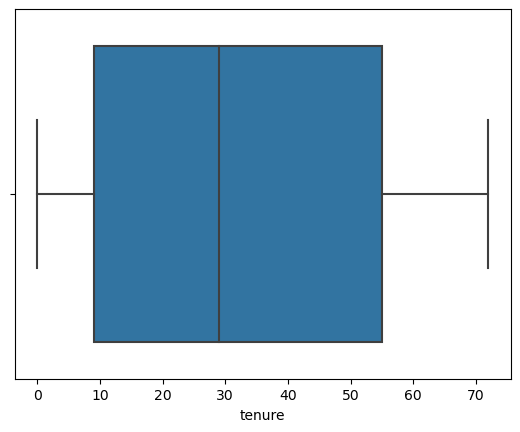

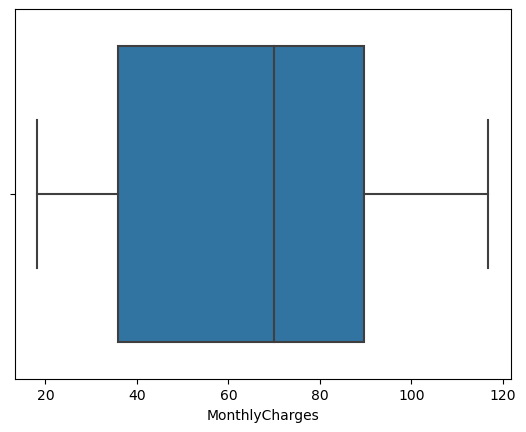

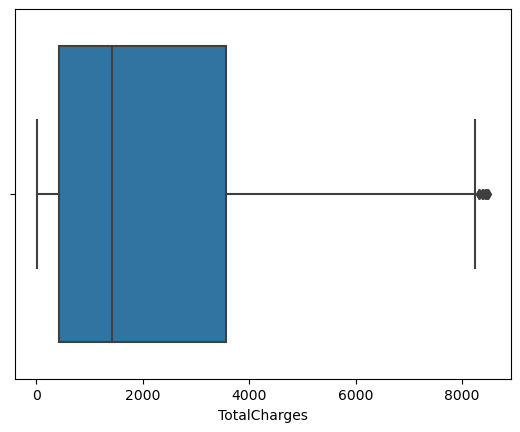

In [58]:

sns.boxplot(x='tenure',data=dfact)
plt.figure()
sns.boxplot(x='MonthlyCharges',data=dfact)
plt.figure()
sns.boxplot(x='TotalCharges',data=dfact)

In [83]:
#we have outliees in Total Charges
# Now we will trat outliers using IQR, upper limit, lower limit

In [60]:
#finding IQR
percentile25=dfact['TotalCharges'].quantile(0.25)
percentile75=dfact['TotalCharges'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75+1.5*iqr
lowerlimit=percentile25-1.5*iqr

In [61]:
upperlimit,lowerlimit

(8287.475, -4301.525)

In [62]:
#finding outliers

In [63]:
dfact[dfact['TotalCharges']>upperlimit]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
166,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20
390,2388-LAESQ,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.85,8317.95
760,7359-WWYJV,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),114.45,8375.05
1043,0164-APGRB,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70
1279,8606-CIQUL,Male,1,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.75,8399.15
1524,0017-IUDMW,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.80,8456.75
1543,8015-IHCGW,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,115.50,8425.15
1746,9298-WGMRW,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75


<Axes: xlabel='TotalCharges'>

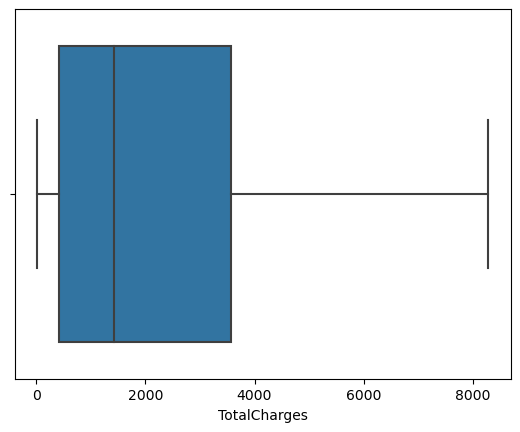

In [64]:
#capping outliers by upper or lower limit
dfact['TotalCharges'] = np.where(dfact['TotalCharges'] < lowerlimit, lowerlimit, dfact['TotalCharges'])
dfact['TotalCharges'] = np.where(dfact['TotalCharges'] > upperlimit, upperlimit, dfact['TotalCharges'])
plt.figure()
sns.boxplot(x='TotalCharges',data=dfact)

In [ ]:
#Outliers has been treated now
# we can droup the customer id to check the duplicates and save space

In [65]:
dfact.drop('customerID',axis=1,inplace=True)

In [66]:
dups = dfact.duplicated()
print('number of duplicate = %d' % (dups.sum()))

number of duplicate = 3


In [ ]:
#we have 03 duplicate, we can drop them

In [67]:
dfact = dfact.drop_duplicates()

In [68]:
dfact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1758 non-null   object 
 1   SeniorCitizen     1758 non-null   int64  
 2   Partner           1758 non-null   object 
 3   Dependents        1758 non-null   object 
 4   tenure            1758 non-null   int64  
 5   PhoneService      1758 non-null   object 
 6   MultipleLines     1758 non-null   object 
 7   InternetService   1758 non-null   object 
 8   OnlineSecurity    1758 non-null   object 
 9   OnlineBackup      1758 non-null   object 
 10  DeviceProtection  1758 non-null   object 
 11  TechSupport       1758 non-null   object 
 12  StreamingTV       1758 non-null   object 
 13  StreamingMovies   1758 non-null   object 
 14  Contract          1758 non-null   object 
 15  PaperlessBilling  1758 non-null   object 
 16  PaymentMethod     1758 non-null   object 


In [ ]:
#Now we will change do the Lable encoding on Catr=egorical coloumn and the data type will be changes automatically

In [69]:
dfact['Gender_encoded'] = dfact['gender'].map({'Male':0,'Female':1})
dfact['Partner_encoded'] = dfact['Partner'].map({'No':0,'Yes':1})
dfact['Dependents_encoded'] = dfact['Dependents'].map({'No':0,'Yes':1})
dfact['PhoneService_encoded'] = dfact['PhoneService'].map({'No':0,'Yes':1})
dfact['MultipleLines_encoded'] = dfact['MultipleLines'].map({'No':0,'Yes':1,'No phone service':2})
dfact['InternetService_encoded'] = dfact['InternetService'].map({'No':0,'DSL':1,'Fiber optic':2})
dfact['OnlineSecurity_encoded'] = dfact['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':2})
dfact['OnlineBackup_encoded'] = dfact['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':2})
dfact['DeviceProtection_encoded'] = dfact['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':2})
dfact['TechSupport_encoded'] = dfact['TechSupport'].map({'No':0,'Yes':1,'No internet service':2})
dfact['StreamingTV_encoded'] = dfact['StreamingTV'].map({'No':0,'Yes':1,'No internet service':2})
dfact['StreamingMovies_encoded'] = dfact['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':2})
dfact['Contract_encoded'] = dfact['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
dfact['PaperlessBilling_encoded'] = dfact['PaperlessBilling'].map({'No':0,'Yes':1})
dfact['PaymentMethod_encoded'] = dfact['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [70]:
dfact.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded
0,Female,0,No,No,52,Yes,Yes,Fiber optic,No,Yes,...,2,0,1,0,0,0,0,1,1,1
1,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,...,0,2,2,2,2,2,2,0,0,2
2,Male,0,Yes,Yes,10,No,No phone service,DSL,Yes,Yes,...,1,1,1,1,1,0,1,2,0,3
3,Male,0,No,No,1,Yes,No,Fiber optic,No,Yes,...,2,0,1,0,0,0,1,0,1,0
4,Male,0,Yes,Yes,52,No,No phone service,DSL,No,Yes,...,1,0,1,1,1,1,0,2,0,1


In [71]:
dfact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 1760
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    1758 non-null   object 
 1   SeniorCitizen             1758 non-null   int64  
 2   Partner                   1758 non-null   object 
 3   Dependents                1758 non-null   object 
 4   tenure                    1758 non-null   int64  
 5   PhoneService              1758 non-null   object 
 6   MultipleLines             1758 non-null   object 
 7   InternetService           1758 non-null   object 
 8   OnlineSecurity            1758 non-null   object 
 9   OnlineBackup              1758 non-null   object 
 10  DeviceProtection          1758 non-null   object 
 11  TechSupport               1758 non-null   object 
 12  StreamingTV               1758 non-null   object 
 13  StreamingMovies           1758 non-null   object 
 14  Contract

In [ ]:
#We can drop the additianal coloum to save space as we have alreadt did label encoding

In [72]:
dfact.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
        'PaymentMethod'],axis=1,inplace=True)

In [74]:
dfact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeniorCitizen             1758 non-null   int64  
 1   tenure                    1758 non-null   int64  
 2   MonthlyCharges            1758 non-null   float64
 3   TotalCharges              1758 non-null   float64
 4   Gender_encoded            1758 non-null   int64  
 5   Partner_encoded           1758 non-null   int64  
 6   Dependents_encoded        1758 non-null   int64  
 7   PhoneService_encoded      1758 non-null   int64  
 8   MultipleLines_encoded     1758 non-null   int64  
 9   InternetService_encoded   1758 non-null   int64  
 10  OnlineSecurity_encoded    1758 non-null   int64  
 11  OnlineBackup_encoded      1758 non-null   int64  
 12  DeviceProtection_encoded  1758 non-null   int64  
 13  TechSupport_encoded       1758 non-null   int64  
 14  Streamin

In [ ]:
# Now we will scale the continous column 

In [84]:
num=['tenure','MonthlyCharges','TotalCharges']      
data_scale=dfact[num].apply(zscore)
dfact[num] = data_scale

In [ ]:
#we eill use heat map to check the correlation

<Axes: >

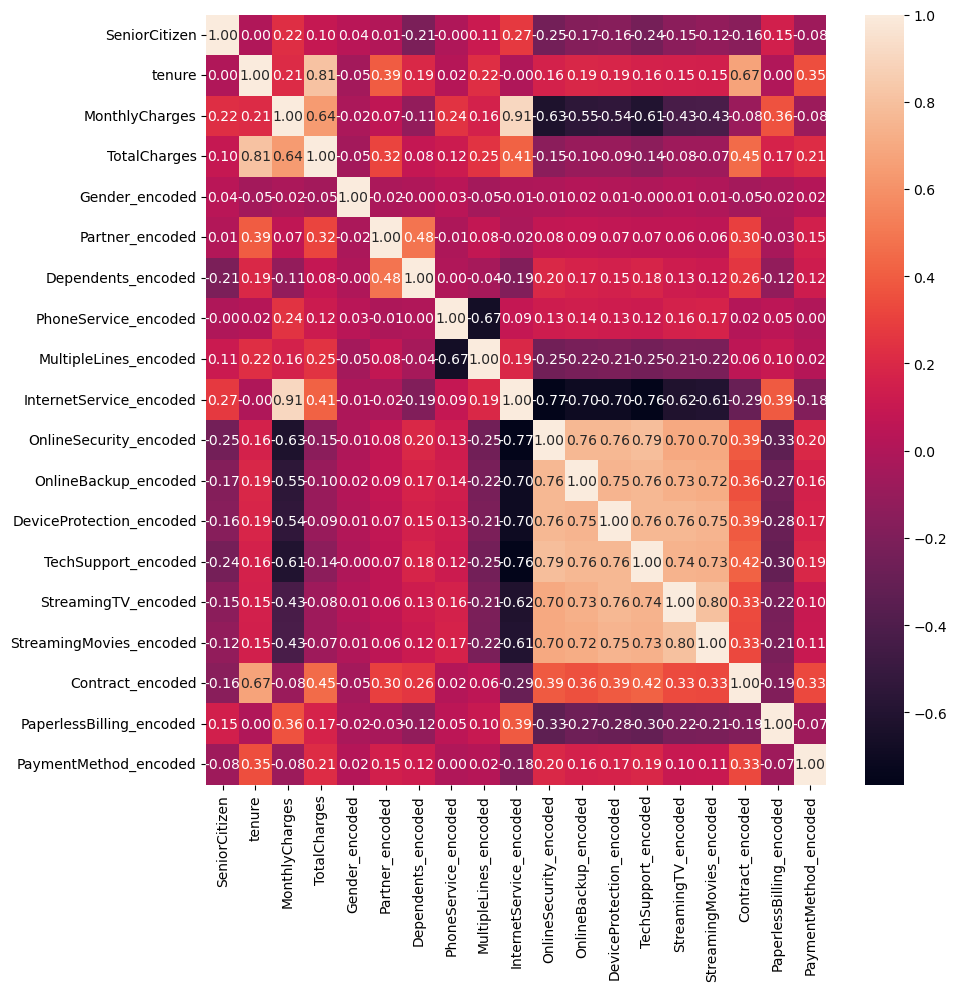

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(dfact.corr(),annot=True,fmt=".2f")

In [77]:
dfact.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded
0,0,0.803225,0.525517,0.928450,1,0,0,1,1,2,0,1,0,0,0,0,1,1,1
1,0,0.022622,-1.350201,-0.638755,1,1,1,1,1,0,2,2,2,2,2,2,0,0,2
2,0,-0.922318,-0.362893,-0.782604,0,1,1,0,2,1,1,1,1,1,0,1,2,0,3
3,0,-1.292078,0.686436,-0.980141,0,0,0,1,0,2,0,1,0,0,0,1,0,1,0
4,0,0.803225,-0.480230,0.138482,0,1,1,0,2,1,0,1,1,1,1,0,2,0,1


In [ ]:
# Now we will predict the active_customers data

In [78]:
predictions_dfact = model.predict(dfact)

In [80]:
#Now we will check the predic
# Create a DataFrame to store the predictions
dfact_predictions = pd.DataFrame({'Predicted_Churn': predictions_dfact})

# Print the DataFrame with predictions
print(dfact_predictions)

      Predicted_Churn
0                   0
1                   0
2                   0
3                   1
4                   0
...               ...
1753                0
1754                0
1755                0
1756                0
1757                0

[1758 rows x 1 columns]


In [ ]:
#Random Forest

In [91]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=55)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Performance:")
print(classification_report(y_test, rf_predictions))



Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       963
           1       0.66      0.50      0.57       355

    accuracy                           0.80      1318
   macro avg       0.75      0.70      0.72      1318
weighted avg       0.79      0.80      0.79      1318



In [92]:
# Make predictions on the 'dfact' dataset
rf_predictions_dfact = rf_model.predict(dfact)


In [93]:
dfact_predictions = pd.DataFrame({'Predicted_Churn': rf_predictions_dfact})


In [94]:
print(dfact_predictions)


      Predicted_Churn
0                   0
1                   0
2                   0
3                   1
4                   0
...               ...
1753                0
1754                0
1755                0
1756                0
1757                0

[1758 rows x 1 columns]
